In [407]:
# Crypto prices' analysis
import requests
import json
import pandas as pd

import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

In [518]:
# Function for CryptoCompare HistoMinute API request

def get_histominute_data(exchange):
    url = 'https://min-api.cryptocompare.com/data/histominute?fsym=ETH&tsym=BTC&limit=1440&aggregate=1&e={}'
    response = requests.post(url.format(exchange))
    data = json.loads(response.content)
    df = pd.DataFrame.from_dict(data["Data"], orient="columns")
    
    return pd.DataFrame(df)

In [519]:
# json list to pandas dataframe
exchange_data = {}
exchanges = ['POLONIEX', 'BITTREX', 'GDAX', 'KRAKEN', 'GEMINI']
for exchange in exchanges:
    exchange_data[exchange] = get_histominute_data(exchange)



In [520]:
exchange_data['BITTREX'].head()

,close,high,low,open,time,volumefrom,volumeto
0,0.05005,0.05031,0.04999,0.05031,1510656420,155.64,7.82
1,0.05020,0.05033,0.05001,0.05005,1510656480,53.05,2.67
2,0.05020,0.05031,0.05001,0.05020,1510656540,24.99,1.25
3,0.05008,0.05020,0.05006,0.05020,1510656600,21.81,1.09
4,0.05020,0.05033,0.05008,0.05008,1510656660,20.21,1.01


In [521]:
# Function to merge dataframes into a single dataframe
def merge_dfs_on_column(dataframes, labels, col):
    '''Merge a single column of each dataframe into a new combined dataframe'''
    series_dict = {}
    for index in range(len(dataframes)):
        series_dict[labels[index]] = dataframes[index][col]
        
    return pd.DataFrame(series_dict)

In [522]:
btc_usd_datasets = merge_dfs_on_column(list(exchange_data.values()), list(exchange_data.keys()), 'close')


In [523]:
btc_usd_datasets.head()

,BITTREX,GDAX,GEMINI,KRAKEN,POLONIEX
0,0.05005,0.05019,0.04993,0.04964,0.05014
1,0.05020,0.05011,0.04993,0.04964,0.05014
2,0.05020,0.05011,0.05011,0.04997,0.05022
3,0.05008,0.05020,0.05015,0.04994,0.05024
4,0.05020,0.05026,0.05015,0.05000,0.05035


In [524]:
# Add DateTime Column
btc_usd_datasets["DATE"] = exchange_data['BITTREX']['time']

In [525]:
# Calculating difference series price data
sum = 0;
for exchange in exchanges:
    sum = sum+btc_usd_datasets[exchange]


In [526]:
dt_new = btc_usd_datasets

In [527]:
dt_new['DATE'] = pd.to_datetime(dt_new['DATE'],unit='s')
dt_new.head()

,BITTREX,GDAX,GEMINI,KRAKEN,POLONIEX,DATE
0,0.05005,0.05019,0.04993,0.04964,0.05014,2017-11-14 10:47:00
1,0.05020,0.05011,0.04993,0.04964,0.05014,2017-11-14 10:48:00
2,0.05020,0.05011,0.05011,0.04997,0.05022,2017-11-14 10:49:00
3,0.05008,0.05020,0.05015,0.04994,0.05024,2017-11-14 10:50:00
4,0.05020,0.05026,0.05015,0.05000,0.05035,2017-11-14 10:51:00


<function matplotlib.pyplot.show>

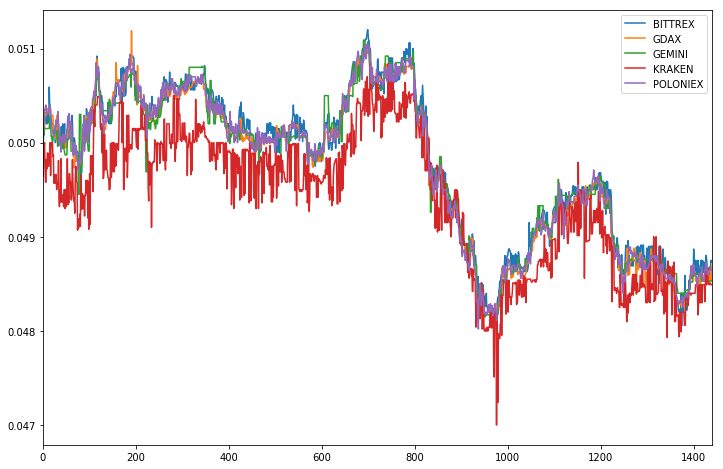

In [528]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

dt_new = dt_new.loc[:,dt_new.columns!='AVG']

matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)
dt_new.plot()

plt.show

In [535]:
sum = 0;
for exchange in exchanges:
    sum = sum + dt_new[exchange]

dt_new['SUM'] = sum
dt_new['AVG'] = dt_new['SUM']/len(dt_dif.columns)

dt_new.head()

,BITTREX,GDAX,GEMINI,KRAKEN,POLONIEX,DATE,SUM,AVG
0,0.05005,0.05019,0.04993,0.04964,0.05014,2017-11-14 10:47:00,0.24995,0.049990
1,0.05020,0.05011,0.04993,0.04964,0.05014,2017-11-14 10:48:00,0.25002,0.050004
2,0.05020,0.05011,0.05011,0.04997,0.05022,2017-11-14 10:49:00,0.25061,0.050122
3,0.05008,0.05020,0.05015,0.04994,0.05024,2017-11-14 10:50:00,0.25061,0.050122
4,0.05020,0.05026,0.05015,0.05000,0.05035,2017-11-14 10:51:00,0.25096,0.050192


In [536]:
#Price difference line
dt_dif = dt_new.copy()
# Calculate Price difference with average price *************** 
for exchange in exchanges:   
    dt_dif[exchange]=dt_dif[exchange]-dt_dif['AVG']
    

In [540]:

# Remove Average column
dt_dif = dt_dif.loc[:,dt_dif.columns!='SUM']
dt_dif = dt_dif.loc[:,dt_dif.columns!='AVG']
dt_dif['Zero line'] = 0

<function matplotlib.pyplot.show>

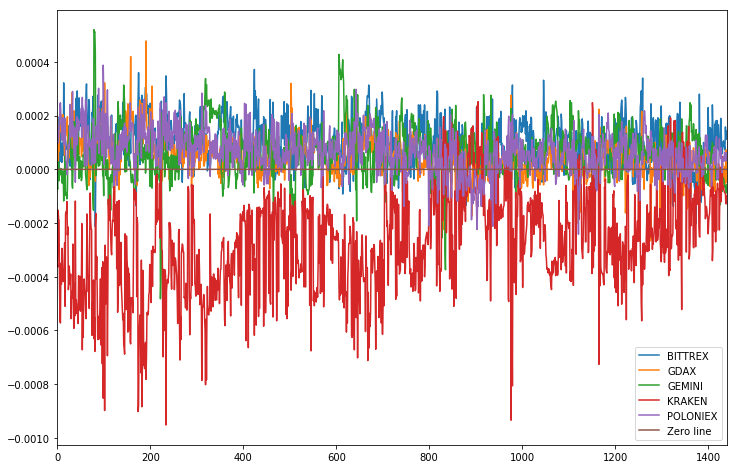

In [541]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)
dt_dif.plot()

plt.show